In this kernel we will be doing following things 

1.Exploring the stock price

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/vbr.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/dvy.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/syv.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/labu.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/axjl.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/idlv.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/ewc.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/iyf.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/rpg.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/sbm.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/ibnd.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/dgrs.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/vcsh.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/dgp.us.txt


### Importing Modules 

In [2]:
import pandas as pd
import numpy as np 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
#from __future__ import division

In [3]:
GOOG = pd.read_csv('../input/price-volume-data-for-all-us-stocks-etfs/Stocks/goog.us.txt')
#data['Date'] = pd.to_datetime(data['Date'])
#data = data.set_index('Date')
#print(data.index.min(), data.index.max())
GOOG.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2014-03-27,568.00,568.00,552.92,558.46,13052,0
1,2014-03-28,561.20,566.43,558.67,559.99,41003,0
2,2014-03-31,566.89,567.00,556.93,556.97,10772,0
3,2014-04-01,558.71,568.45,558.71,567.16,7932,0
4,2014-04-02,599.99,604.83,562.19,567.00,146697,0


### Historical Price Of Google Stock

In [4]:
GOOG['Date']=pd.to_datetime(GOOG['Date'])

### Exploring the Data

In [5]:
GOOG.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,916.0,7.028958e+02,144.142510,494.65,5.605250e+02,710.780,7.938250e+02,1033.99
High,916.0,7.081148e+02,144.697658,495.98,5.650975e+02,718.380,7.980575e+02,1048.39
Low,916.0,6.970583e+02,143.888208,487.56,5.556275e+02,703.450,7.878877e+02,1028.45
Close,916.0,7.028123e+02,144.496999,492.55,5.597925e+02,711.005,7.942575e+02,1039.85
Volume,916.0,1.725988e+06,954072.211570,7932.00,1.173610e+06,1511321.500,1.988164e+06,11164900.00
OpenInt,916.0,0.000000e+00,0.000000,0.00,0.000000e+00,0.000,0.000000e+00,0.00


### Historical Closing Price of Google Stock

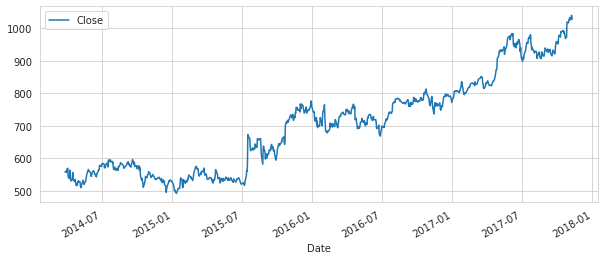

In [6]:
GOOG.plot(x='Date', y='Close',legend=True,figsize=(10,4))
plt.ioff()

So we have the google Stock Prce from Mid of 2013 to End of 2017.Google Share has be studly rising.The early investers must have become really rich.

### Stock Volume Traded 

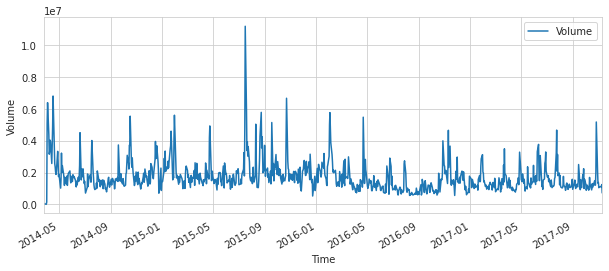

In [7]:
title='VOLUME TRADED'
ylabel='Volume'
xlabel='Time'
ax=GOOG.plot(x='Date', y='Volume',legend=True,figsize=(10,4));
ax.autoscale(axis='x',tight=True)  # use both if want to scale both axis
ax.set(xlabel=xlabel,ylabel=ylabel)
plt.ioff()

If one is more interesed then we can find out the dates of maximum volume trading days.Then check for news headlines for that day.We may be able to find out the reason for the sharp rise in the volumns of stock traded on a paticular day.

### Moving Average for Google Stock

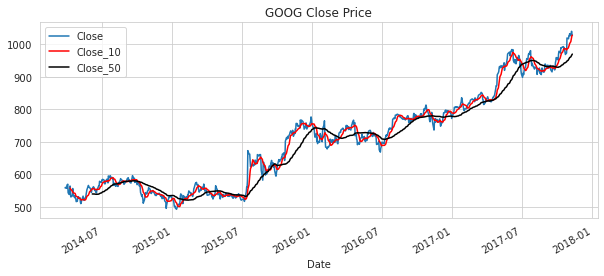

In [8]:
GOOG['Close_10']=GOOG['Close'].rolling(10).mean()
GOOG['Close_50']=GOOG['Close'].rolling(50).mean()
ax=GOOG.plot(x='Date',y='Close',title='GOOG Close Price',figsize=(10,4))
GOOG.plot(x='Date',y='Close_10',color='red',ax=ax)
GOOG.plot(x='Date',y='Close_50',color='k',ax=ax)
plt.ioff()

We can see that there was rapid increae in the Google stock in beween 2015 to 2016.Those who brough in that time luck guys.

### Daily Returns

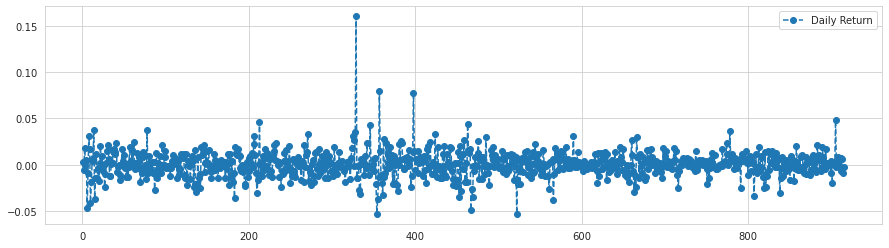

In [9]:
GOOG['Daily Return']=GOOG['Close'].pct_change()
GOOG['Daily Return'].plot(figsize=(15,4),legend=True,linestyle='--',marker='o')
plt.ioff()

Maximun Fluctuation in the stock is around 15%. Otherwse on most days the return would be in between -5% to 5%.

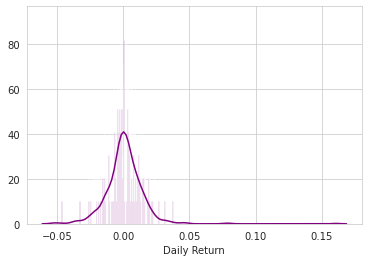

In [10]:
sns.distplot(GOOG['Daily Return'].dropna(),bins=2000,color='purple')
plt.ioff()

So we cab ckearly see from the distribution that the daily returns generally is between -5% to 5%.One reason for this is stock markets do have upper and lower circuit values beond which it is not possible for a stock price to change in single day.

**TO BE CONTINUED **